In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
## Delete the rows or data points to handle the missing values.
df.shape

(891, 15)

In [ ]:
df.dropna().shape

## we can see that after using this specific operation we have lost huge number of data.

(182, 15)

In [10]:
## as sometimes some specific column has large number of data missing so deletion using columns directly.

df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation of Missing Values.
### 1 - Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

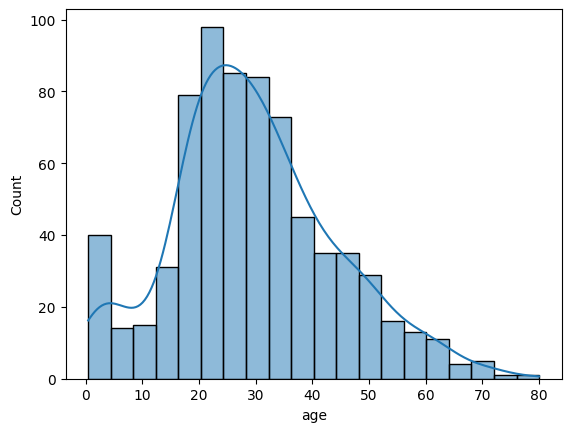

In [12]:
sns.histplot(df['age'],kde=True)

In [16]:
df['Age_Mean'] = df['age'].fillna(df['age'].mean())

In [17]:
df[['Age_Mean','age']]

,Age_Mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [18]:
## Mean Value Imputation works well in case of normal distribution.
## For right skew or left skew it will not work well.

## Median Value Imputation - When we have outliers in the dataset.

In [22]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [24]:
df[['age','Age_Mean','age_median']]

,age,Age_Mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


# Mode Imputation Technique - Categorical Values

In [25]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Median,Age_Mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [26]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df['embarked'].notna()

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: embarked, Length: 891, dtype: bool

In [29]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [30]:
mode_value

'S'

In [31]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [32]:
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [33]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [34]:
df['embarked'].isnull().sum()

np.int64(2)

### Handling Imbalanced DataSet
## 1 - UpSampling
## 2 - DownSampling

In [ ]:
import numpy as np
import pandas as pd

# Set the random set for reproducibilty

np.random.seed(123) ## setting the seed value for random generator 
# Create a sample dataframe

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [36]:
n_class_0,n_class_1

(900, 100)

In [38]:
## Creating Dataframe with imbalanced dataset

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc = 0,scale = 1, size = n_class_0),
    'target' : [0] * n_class_0
    }
)

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 5, scale = 1, size=n_class_1),
    'feature_2' : np.random.normal(loc = 5, scale = 1, size = n_class_1),
    'target' : [1] * n_class_1
    
})

df = pd.concat([class_1, class_0]).reset_index(drop=True)
df.head()

,feature_1,feature_2,target
0,4.699768,5.139033,1
1,4.367739,5.025577,1
2,4.795683,4.803557,1
3,5.213696,6.312255,1
4,6.033878,6.187417,1


In [39]:
df.tail()

,feature_1,feature_2,target
995,0.238761,-0.003155,0
996,-1.106386,-0.430660,0
997,0.366732,-0.146416,0
998,1.023906,1.160176,0
999,-0.210056,-0.641512,0


In [40]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [41]:
## Upsampling
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0] 

In [43]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority,replace = True,# Sample With Replacement
                                 n_samples=len(df_majority),
                                 random_state=42
                                 )

In [45]:
df_minority_upsampled.shape

(900, 3)

In [46]:
df_minority_upsampled.head()

,feature_1,feature_2,target
51,4.125854,4.843917,1
92,5.196570,4.397425,1
14,4.932170,5.998053,1
71,5.272825,6.034197,1
60,5.870056,4.550485,1


In [48]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [49]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

## DownSampling

In [50]:
import numpy as np
import pandas as pd

# Set the random set for reproducibilty

np.random.seed(123) ## setting the seed value for random generator 
# Create a sample dataframe

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

## Creating Dataframe with imbalanced dataset

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 0,scale=1,size=n_class_0),
    'feature_2' : np.random.normal(loc = 0,scale = 1, size = n_class_0),
    'target' : [0] * n_class_0
    }
)

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 5, scale = 1, size=n_class_1),
    'feature_2' : np.random.normal(loc = 5, scale = 1, size = n_class_1),
    'target' : [1] * n_class_1
    
})

df = pd.concat([class_1, class_0]).reset_index(drop=True)
df.head()

,feature_1,feature_2,target
0,4.699768,5.139033,1
1,4.367739,5.025577,1
2,4.795683,4.803557,1
3,5.213696,6.312255,1
4,6.033878,6.187417,1


In [53]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [54]:
## downsampling

df_majority = df[df['target'] == 0]
df_minority = df[df['target'] == 1]

In [55]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority,replace = False,# need to reduce the datapoints
                                 n_samples=len(df_minority),
                                 random_state=42
                                 )

In [56]:
df_majority_downsampled.shape

(100, 3)

In [57]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

In [58]:
df_downsampled

,feature_1,feature_2,target
0,4.699768,5.139033,1
1,4.367739,5.025577,1
2,4.795683,4.803557,1
3,5.213696,6.312255,1
4,6.033878,6.187417,1
...,...,...,...
498,-0.168426,0.553775,0
176,-0.403366,0.081491,0
296,-0.269293,0.611238,0
731,-0.295829,0.671673,0


In [59]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

#### SMOTE (Synthetic Minority over-sampling Technique)

#### Smote involves generating synthetic instances of the minority class by interpolating between existing instaces

In [60]:
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples = 1000, n_redundant=0, n_features=2, n_clusters_per_class=1,
                    weights=[0.90],random_state=12
                    )


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [ ]:
import pandas as pd

df1 = pd.DataFrame(X, columns=['f1','f2'])


,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
995,-0.712495,-0.880452
996,-2.625830,-2.827891
997,-1.326439,-1.815178
998,-0.833486,-0.514647


In [92]:
df2 = pd.DataFrame(y,columns=['target'])

final_df = pd.concat([df1,df2],axis=1)

In [91]:
final_df.head()
final_df.tail()

,f1,f2,target
995,NaN,NaN,0.0
996,NaN,NaN,0.0
997,NaN,NaN,0.0
998,NaN,NaN,0.0
999,NaN,NaN,0.0


In [87]:
final_df.target.value_counts()

target
0.0    900
1.0    100
Name: count, dtype: int64

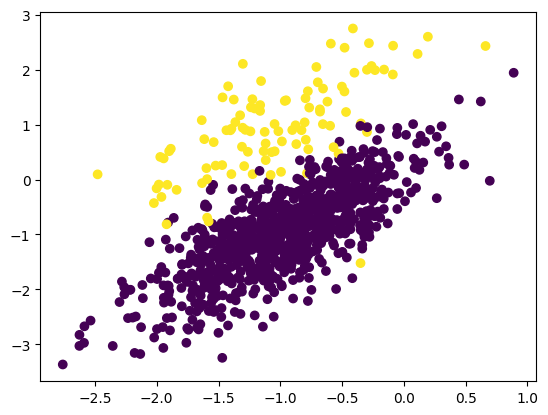

In [93]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])
plt.show()

In [73]:
!pip install imblearn

90749.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [1]:
from imblearn.over_sampling import SMOTE

In [2]:
## transform the dataset

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
final_df['target_new'] = final_df['target'].dropna()
X_resampled, y_resampled = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target_new'])


NameError: name 'final_df' is not defined

In [3]:
X_resampled.shape

NameError: name 'X_resampled' is not defined

In [96]:
y_resampled.shape

(1800,)

In [99]:
df1 = pd.DataFrame(X_resampled,columns=['f1','f2'])
df2 = pd.DataFrame(y_resampled,columns=['target'])

df = pd.concat([df1,df2],axis=1)

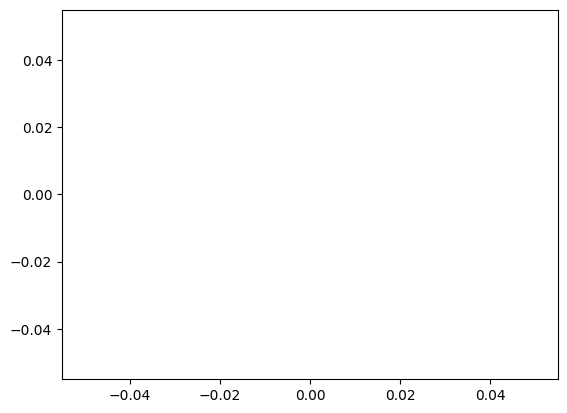

In [102]:
plt.scatter(df['f1'],df['f2'],c = df['target'])
plt.show()

### 5 - Number Summary and Box Plot


In [4]:
import numpy as np

In [6]:
## Minimum, Maximum, Median, Q1, Q3, IQR

In [7]:
lst_marks = [98,94,92,89,85,96,76,86,82,67,79,85,99,94,96,99,98,94,91]
minimum,Q1,median,Q3,maximum = np.percentile(lst_marks,[0.0,0.25,0.50,0.75,1.00])

In [8]:
minimum,Q1,median,Q3,maximum

(np.float64(67.0),
 np.float64(67.405),
 np.float64(67.81),
 np.float64(68.215),
 np.float64(68.62))

In [9]:
IQR = Q3-Q1

In [11]:
print(IQR)

0.8100000000000023


In [16]:
lower_fence = Q1-(1.5)*(IQR)

higher_fence = Q3+(1.5)*(IQR)

In [17]:
print(lower_fence)
print(higher_fence)

66.19
69.43


In [18]:
import seaborn as sns


<Axes: >

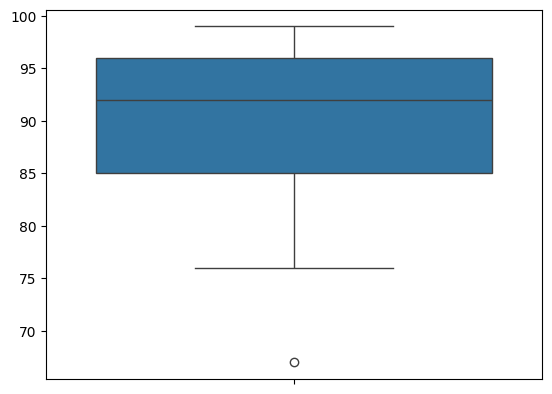

In [19]:
sns.boxplot(lst_marks)